### Project title: Simulating average national house prices in Ireland 

##### Project 1 for Programming for Data Analysis. Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 
##### status: complete  
##### Submission due date: 05/12/2023 with extension to 15/12/2023

---


#### Problem statement (from lecturer Brian McGinley)
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.

---

### Contents 

1. Introduction and rationale 
2. Objective 
3. Collecting and processing the data.
    - 3.1. Gathering revelvant data
    - 3.2. References 
    - 3.3. Importing data 
        - 3.3.1. Interest rates 
        - 3.3.2. Hosuing prices 
        - 3.3.3. Housing supply 
        - 3.3.4. Population 
        - 3.3.5. GDP
4. Visualising the data sets. 
    - 4.1 - Data summary - date ranges and intervals 
5. Some Exploratory data analysis
    - 5.1. reprocessing for EDA
    - 5.2. Dataframe 
    - 5.3. replot data 
    - 5.4. correlation coefficients 
6. Train linear regression model using random split data set and time based split -  Use model to simulate data for testing 
    - 6.1. Random data split using train_test_split()
    - 6.2. Time based split  
7. Evaluate 


### 1. Introduction and rationale 

---


Choosing a real-world phenomenon is a more difficult task than it first seems. Having initially considered taking on some grande data set such as "*the weather*" or "*population collapse*" [1], I thought better of it and went for something more close to home (for me and my family currently). I chose the houseing market. 

The average national monthly house price (*price*) is my primary variable of interest. 

This is a definitely a multi-variable phenomona with many contributing factors, however I wanted to normalise the data set to really only focus on economic and supply/demand indicators. Therefore variables such as location, square meterage, number of bedrooms, number of bathrooms, building energy rating (BER), year built and other amenities, although are very important in determining house price, are not be included and we assume every house is identical and in the same location. [2,3]. In essense, we are exploring the average house nationwide.   

The 4 dependent variables that I will consider in this project, in addition to the primary variable - house price (*price*), are the housing supply (*supp*), interest rates (*intra*), speculative demand (*deman*) and the economy (*econ*). 

Other factors (subfactors) which were considered or can be considered subfactors to the variables were; unemployment rate (inversely related to *econ* and *deman*), wage growth (positively related into *econ* and *deman*), mortgage availability (could be an additional valiable on its own based on the current bank lending policies), consumer condifdence/affordability (related to *econ*, income and *supp*), population increase (related *demand*) and current rental prices/stock (correlated to *supp* and *demand*).


List of variables included 

- *price* - Average national house price 
- *supp*   - housing supply (New Dwellings completed)
- *intra*  - interest rates (Financial - Mortgage rates)
- *deman* - current speculative demand (based on population)
- *econ* - economic growth (based on Gross domestic product GDP figures)



#### References 
[1] Elon Musk: https://thehill.com/changing-america/sustainability/565224-elon-musk-says-population-collapse-potentially-the-greatest/


Factors affecting housing market

[2] https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/

[3] https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp



---

### 2. Objective 
---

The houseing market is a complicated system but ulimately can be modelled/simulated using sets of data in a time series. e.g. house price as a function of time. 

My objective in this project is to gather enough existing historic data on a number of housing market variables, determine their ralationship to each other using exploratory data analysis, split this data set into train and test,  generate a model using linear regression to apply to the test house prices in the time period and then compare the modelled data with the test date. 

---

### 3. Collecting and processing the data 

---

### 3.1 gathering revelvant data  


The Irish central statistics office (CSO) website is a good resource for finding the revelvant data sets for this project. However, the datasets are often very difficult to find and not up to date. Most often data sets have very different date ranges, formats and reporting intervals (some monthly, some quarterly and some yearly) which takes a lot of time to tidy up. For instance, the house prices historic series reported monthly house prices in Euro from Jan 1975- Mar 2008 [5.1], however the reporting then shifts to house price indexing [5.2].   

Types of variables - all variables are numeric variables 

- *price* - average national monthly house price - in Euros - variable = integer
- *supp*   - average monthly housing supply - in number - variable= integer (int64)
- *intra*  - interest rates - in percentage %, variable type = float (float64)
- *deman* - current speculative demand - as a ratio of the population - population and econ - 
- *econ* - economic growth - as a ratio - income growth and natioanl GDP? 

Some data sets from the CSO contain categorical variables which are used to fileter the data appropriately. 

### 3.2 References 

CSO data for Irish market 

[4] Interest rates: https://data.cso.ie/table/FIM09 + https://data.cso.ie/table/CBM02

[5] House prices: https://data.cso.ie/table/HSA06 + https://data.cso.ie/table/HPM06

[6] Population: https://data.cso.ie/table/PEA01

[7] Income : https://data.cso.ie/table/NAH07

[8] Housing supply: https://www.cso.ie/en/releasesandpublications/ep/p-mip/mip2015/econ/eh/

[9] Exchequer Account (Historical Series): https://data.cso.ie/table/FIQ02

[10] Stock exchange indices: https://data.cso.ie/table/FIM05

[11] GDP per Capita: Historic economy: https://ourworldindata.org/grapher/gdp-per-capita-penn-world-table?tab=chart&region=Europe&country=~IRL

#### Import revelvant packages for python 

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 3.3 Import real data sets - .csv files saved from CSO.ie website. 

In this section, we import all data sets revelvant to the 5 variables and generate pandas readable 'Date' columns for plotting purposes. If necessary, i have filtered the data set to extract the revelvant information using .loc function from categorical data columns.  
example code for filtering the house price data to extract the New House Prices Nationaly 


`real_price_filtered = real_price.loc[(real_price['Area'] == 'National') & (real_price['Statistic Label'] == 'New House Prices')]`

#### 3.3.1  Historic interest rates 
The interest rate data from CSO is reported monthly from 1975M01 - 2023M09 - however the date format isn't good for plotting etc.. Remove the date column, generate new Date column in a pandas readable form and add to the data set.  
The csv file imported below, "interest rates.csv", is a amalgamation of two data sets for period 1975M01 - 2008M03 [4.1] and period 2003M01 - 2023M09 [4.2] 


In [2]:
current_directory = os.getcwd()
# relative path from the notebook to the Excel file
relative_path = "data\\project1\\interest_rates.csv"
# Join the two 
file_path = os.path.join(current_directory, relative_path)

real_intra = pd.read_csv(file_path, names = ['date', 'r_intra'])
real_intra.head(2)

,date,r_intra
0,1975M01,11.25
1,1975M02,11.25


make a new date dataframe for the monthly data - 585 months in date range. We drop the old date column and used to concat() to join the new data column. 

In [3]:
idx = pd.date_range("1975-01-01", periods = 585, freq ="M" )  # stating Jan 1975 - Sep 2023 - 585 months of data 
df_idx = pd.DataFrame(idx, columns=['Date'])
#df_idx.head()
real_intra = real_intra.drop(columns=['date']) 
real_intra_idx = pd.concat([df_idx, real_intra], axis = 1)
real_intra_idx.head(2) # it worked ! 

,Date,r_intra
0,1975-01-31,11.25
1,1975-02-28,11.25


### 3.3.2. Historic house prices 
The house prices data set from the CSO are reported quarterly from 1975Q1 - 2016Q4. The date column needs to be updated as well. 
This data set also has useful categorical data. New House Prices/ Second Hand House Prices can be selected from the "Statistical label" column and from the "Area" column the data can be filtered to look at prices nationally or by city (Dublin, Cork, Galway, Limerick, Waterford and Other area). For this work, the data was filtered to focus on the "National" house prices and "New House Prices" only. The reason for selecting "New House Prices" is due to the available data for supply (*supp*) is for new dwellings complete as we shall see next. 

In [4]:
relative_path2 = "data\\project1\\house_prices.csv"
# Join the two 
file_path2 = os.path.join(current_directory, relative_path2)
real_price = pd.read_csv(file_path2)
#price['Area'].value_counts()
#price['Statistic Label'].value_counts()
real_price.head(2)

,Statistic Label,Quarter,Area,UNIT,VALUE
0,New House Prices,1975Q1,Cork,Euro,10667.0
1,New House Prices,1975Q2,Cork,Euro,12131.0


In [5]:
# filter data 
real_price_filtered = real_price.loc[(real_price['Area'] == 'National') & (real_price['Statistic Label'] == 'New House Prices')]
real_price_filtered1 = real_price_filtered.reset_index(drop=True)
real_price_filtered1.head(2)

,Statistic Label,Quarter,Area,UNIT,VALUE
0,New House Prices,1975Q1,National,Euro,11887.0
1,New House Prices,1975Q2,National,Euro,12837.0


In [6]:
# Convert the "Quarter" column to the correct datetime format   - have spent ages trying to get this to work but this won't read in the 1975Q1 - has trouble with the Q 
#real_price['Quarter'] = pd.to_datetime(real_price['Quarter'], format='%YYYY%Q')

# make a new date dataframe for the quarterly data - 168 Quarters in date range 
idx2 = pd.date_range("1975-01-01", periods = 168, freq ="Q" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx2 = pd.DataFrame(idx2)
df_idx2.index = range(len(df_idx2))
df_idx2 = pd.DataFrame({'Date': idx2})
df_idx2.head(2) # works well

,Date
0,1975-03-31
1,1975-06-30


In [7]:
real_price_filtered_idx2 = pd.concat([df_idx2, real_price_filtered1], axis = 1)
real_price_filtered_idx2.head(3) # it worked ! 

,Date,Statistic Label,Quarter,Area,UNIT,VALUE
0,1975-03-31,New House Prices,1975Q1,National,Euro,11887.0
1,1975-06-30,New House Prices,1975Q2,National,Euro,12837.0
2,1975-09-30,New House Prices,1975Q3,National,Euro,13269.0


An additional house price data set for the period Jan 2005 - Sep 2023 was examined also. This data set reports the monthly residental house price index with a BASE = 2005 (275394 Euro) 

In [8]:
relative_path3 = "data\\project1\\Price-index.csv"
# Join the two 
file_path3 = os.path.join(current_directory, relative_path3)
real_price_index = pd.read_csv(file_path3)

real_price_index
real_price_index_filtered = real_price_index.loc[(real_price_index['Type of Residential Property'] == 'National - all residential properties') & (real_price_index['Statistic Label'] == 'Residential Property Price Index')]
real_price_index_filtered = real_price_index_filtered.reset_index(drop=True)
real_price_index_filtered['Statistic Label'].value_counts()
real_price_index_filtered

,Statistic Label,Month,Type of Residential Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base Jan 2005 = 100,100.0
1,Residential Property Price Index,2005 February,National - all residential properties,Base Jan 2005 = 100,100.8
2,Residential Property Price Index,2005 March,National - all residential properties,Base Jan 2005 = 100,101.4
3,Residential Property Price Index,2005 April,National - all residential properties,Base Jan 2005 = 100,102.1
4,Residential Property Price Index,2005 May,National - all residential properties,Base Jan 2005 = 100,102.8
...,...,...,...,...,...
220,Residential Property Price Index,2023 May,National - all residential properties,Base Jan 2005 = 100,132.8
221,Residential Property Price Index,2023 June,National - all residential properties,Base Jan 2005 = 100,133.6
222,Residential Property Price Index,2023 July,National - all residential properties,Base Jan 2005 = 100,134.3
223,Residential Property Price Index,2023 August,National - all residential properties,Base Jan 2005 = 100,135.0


In [9]:
idx7 = pd.date_range("2005-01-01", periods = 225, freq ="M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx7 = pd.DataFrame(idx7)
df_idx7.index = range(len(df_idx7))
df_idx7 = pd.DataFrame({'Date': idx7})
df_idx7.head(3) # works well

,Date
0,2005-01-31
1,2005-02-28
2,2005-03-31


In [10]:
real_price_index_filtered_idx7 = pd.concat([df_idx7, real_price_index_filtered], axis = 1)
real_price_index_filtered_idx7.head(3) # it worked ! 

,Date,Statistic Label,Month,Type of Residential Property,UNIT,VALUE
0,2005-01-31,Residential Property Price Index,2005 January,National - all residential properties,Base Jan 2005 = 100,100.0
1,2005-02-28,Residential Property Price Index,2005 February,National - all residential properties,Base Jan 2005 = 100,100.8
2,2005-03-31,Residential Property Price Index,2005 March,National - all residential properties,Base Jan 2005 = 100,101.4


In [11]:
# convert price index to Euro 
real_price_index_filtered_idx7['VALUE'] = (real_price_index_filtered_idx7['VALUE']/100)*275394
real_price_index_filtered_idx7

,Date,Statistic Label,Month,Type of Residential Property,UNIT,VALUE
0,2005-01-31,Residential Property Price Index,2005 January,National - all residential properties,Base Jan 2005 = 100,275394.000
1,2005-02-28,Residential Property Price Index,2005 February,National - all residential properties,Base Jan 2005 = 100,277597.152
2,2005-03-31,Residential Property Price Index,2005 March,National - all residential properties,Base Jan 2005 = 100,279249.516
3,2005-04-30,Residential Property Price Index,2005 April,National - all residential properties,Base Jan 2005 = 100,281177.274
4,2005-05-31,Residential Property Price Index,2005 May,National - all residential properties,Base Jan 2005 = 100,283105.032
...,...,...,...,...,...,...
220,2023-05-31,Residential Property Price Index,2023 May,National - all residential properties,Base Jan 2005 = 100,365723.232
221,2023-06-30,Residential Property Price Index,2023 June,National - all residential properties,Base Jan 2005 = 100,367926.384
222,2023-07-31,Residential Property Price Index,2023 July,National - all residential properties,Base Jan 2005 = 100,369854.142
223,2023-08-31,Residential Property Price Index,2023 August,National - all residential properties,Base Jan 2005 = 100,371781.900


### 3.3.3. Historic housing supply 

This data set [ref 8] gives the yearly supply of new houses completed in Ireland from 1970- 2016. 

In [12]:
relative_path4 = "data\\project1\\housing_supply.csv"
# Join the two 
file_path4 = os.path.join(current_directory, relative_path4)
real_supp = pd.read_csv(file_path4, names = ['date', 'real_supp'])
real_supp.head(5)
idx3 = pd.date_range("1970-01-01", periods = 46, freq ="12M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx3 = pd.DataFrame(idx3)
df_idx3.index = range(len(df_idx3))
df_idx3 = pd.DataFrame({'Date': idx3})
df_idx3.head()
real_supp_idx3 = pd.concat([df_idx3, real_supp], axis = 1)
real_supp_idx3.head(2)

,Date,date,real_supp
0,1970-01-31,1970,13887
1,1971-01-31,1971,15380


#### 3.3.4. Historic population 
This data set [8] provides the estimated population in persons in April per year from 1950-2023. The data set contains two categorical variables (age group and Sex). For this work, the data was filtered to only focus on population data for 'Age group' == '15 years and over' and 'Sex' == 'Both sexes'. 
Population will be used as a proxy for demand. 

In [13]:
relative_path5 = "data\\project1\\population.csv"
# Join the two 
file_path5 = os.path.join(current_directory, relative_path5)
real_pop = pd.read_csv(file_path5)
#real_pop['Age Group'].value_counts()
#real_pop['Sex'].value_counts()
real_pop.head(2)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4


In [14]:
real_pop_filtered = real_pop.loc[(real_pop['Age Group'] == '15 years and over') & (real_pop['Sex'] == 'Both sexes')]
real_pop_filtered1 = real_pop_filtered.reset_index(drop=True) # reset the index for the filtered data 
real_pop_filtered1.head(2)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,15 years and over,Both sexes,Thousand,2117.8
1,Population Estimates (Persons in April),1951,15 years and over,Both sexes,Thousand,2105.8


In [15]:
idx4 = pd.date_range("1950-04-01", periods = 74, freq ="12M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx4 = pd.DataFrame(idx4)
df_idx4.index = range(len(df_idx4))
df_idx4 = pd.DataFrame({'Date': idx4})
df_idx4.head(2)

,Date
0,1950-04-30
1,1951-04-30


In [16]:
real_pop_filtered_idx4 = pd.concat([df_idx4, real_pop_filtered1], axis = 1)
real_pop_filtered_idx4.head(2) # it worked when the indexes are the same and the column length 

,Date,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,1950-04-30,Population Estimates (Persons in April),1950,15 years and over,Both sexes,Thousand,2117.8
1,1951-04-30,Population Estimates (Persons in April),1951,15 years and over,Both sexes,Thousand,2105.8


#### 3.3.5. Historic economy 

I found two data sets on CSO (the exchequer account and stock exchange) and thought these might work as proxies for the economic performance of the country.  
unfortunately the only historic data i could find was for pre-2008 GFC. 
- the exchequer account data set extends from 1975Q1 - 1997Q4 and
- the stock exchange data set extends from 1975M01 - 1998M12 


After more searching I found the GDP for Ireland on the Ourworld in Data website - this data is more complete 1950 - 2016 [11]. It reports the yearly GDP for Ireland in interational dollars (see below)
- GDP from Ourworld in data - https://ourworldindata.org/grapher/gdp-per-capita-penn-world-table?tab=chart&region=Europe&country=~IRL


*International dollars* are a hypothetical currency that is used to make meaningful comparisons of monetary indicators of living standards.
Figures expressed in international dollars are adjusted for inflation within countries over time, and for differences in the cost of living between countries.
The goal of such adjustments is to provide a unit whose purchasing power is held fixed over time and across countries, such that one international dollar can buy the same quantity and quality of goods and services no matter where or when it is spent.

In [17]:
relative_path6 = "data\\project1\\gdp.csv"
# Join the two 
file_path6 = os.path.join(current_directory, relative_path6)
real_GDP = pd.read_csv(file_path6)

real_GDP_filtered = real_GDP.loc[(real_GDP['Entity'] == 'Ireland')]
real_GDP_filtered1 = real_GDP_filtered.reset_index(drop=True) # reset the index for the filtered data 
idx6 = pd.date_range("1950-01-01", periods = 70, freq ="Y" )
df_idx6 = pd.DataFrame(idx6)
df_idx6.index = range(len(df_idx6))
df_idx6 = pd.DataFrame({'Date': idx6})
real_GDP_filtered_idx6 = pd.concat([df_idx6, real_GDP_filtered1], axis = 1)
real_GDP_filtered_idx6.head(2)

,Date,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,1950-12-31,Ireland,IRL,1950,5439.0483
1,1951-12-31,Ireland,IRL,1951,5512.5454


### 4. Plotting the data as time series  

Below is a time series plot of our primary variable "House prices" reported quarterly from 1975-2016 shown in red [ref 5.1]. The additional house price data set shown in blue from [ref 5.2] which shows monthly data from Jan 2005 to Sep 2023 was extrapolated from the house price index (with base = 2005). The two data sets dont quite match but show a similar trend. 

Note the additional data was not used in the final analysis. 


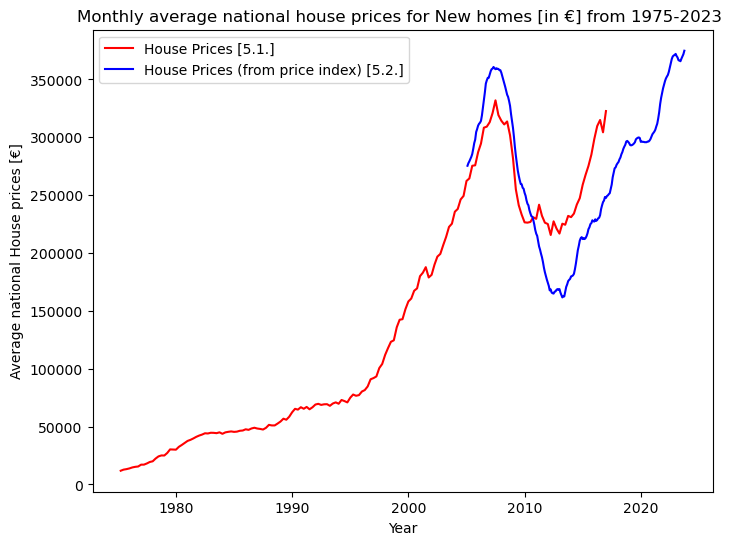

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices [5.1.]')
plt.plot(real_price_index_filtered_idx7['Date'], real_price_index_filtered_idx7['VALUE'], color='Blue', label='House Prices (from price index) [5.2.]')
plt.xlabel('Year')
plt.ylabel('Average national House prices [\u20AC]')
plt.title('Monthly average national house prices for New homes [in \u20AC] from 1975-2023 ')
plt.legend(loc="upper left")
plt.show()

Our dependent variables - supply, demand(population), interest rate and economy (GDP) plotted as a function of the reported time periods.

Text(0.5, 0, 'Year')

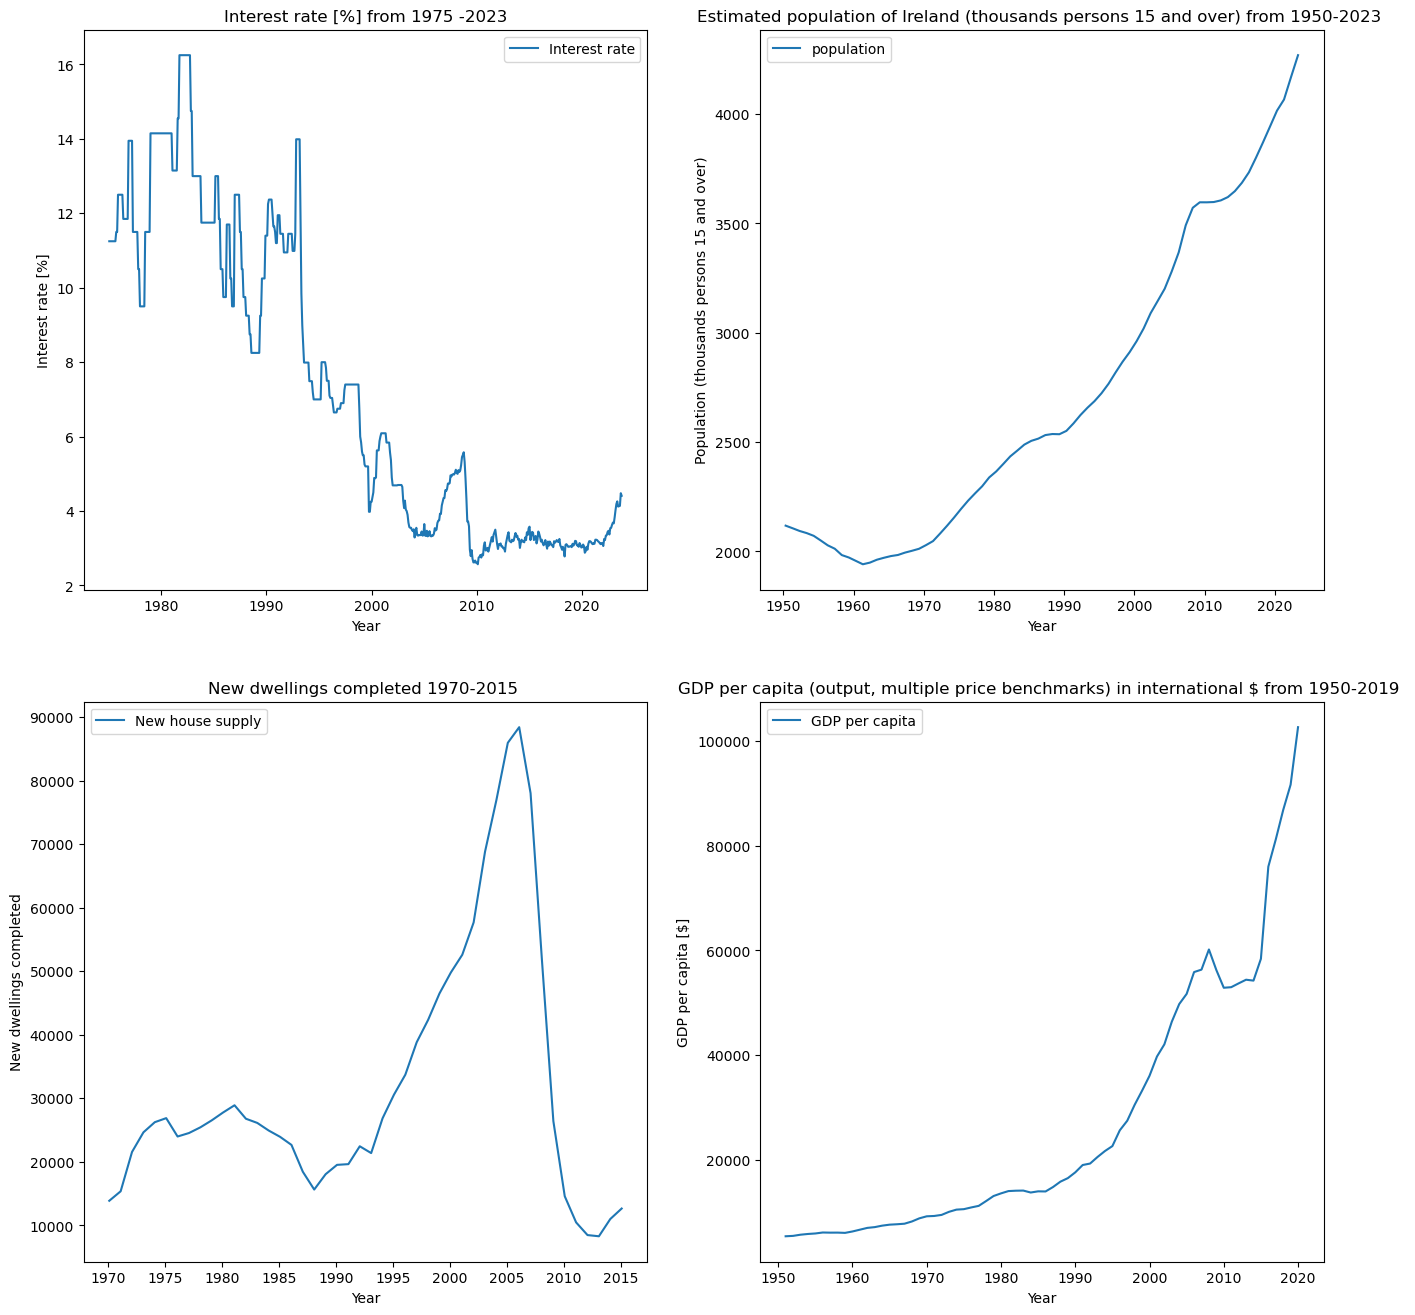

In [19]:
# plots 
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0, 0].plot(real_intra_idx['Date'], real_intra_idx['r_intra'], label = 'Interest rate')
ax[0, 0].set_title('Interest rate [%] from 1975 -2023')
ax[0, 0].legend(loc='upper right')
ax[0, 0].set_ylabel('Interest rate [%]') 
ax[0, 0].set_xlabel('Year')

ax[0, 1].plot(real_pop_filtered_idx4['Date'], real_pop_filtered_idx4['VALUE'], label = 'population')
ax[0, 1].set_title('Estimated population of Ireland (thousands persons 15 and over) from 1950-2023 ')
ax[0, 1].legend(loc='upper left')
ax[0, 1].set_ylabel('Population (thousands persons 15 and over)') 
ax[0, 1].set_xlabel('Year')

ax[1, 0].plot(real_supp_idx3['Date'], real_supp_idx3['real_supp'], label = 'New house supply')
ax[1, 0].set_title('New dwellings completed 1970-2015 ')
ax[1, 0].legend(loc='upper left')
ax[1, 0].set_ylabel('New dwellings completed') 
ax[1, 0].set_xlabel('Year')

ax[1, 1].plot(real_GDP_filtered_idx6['Date'], real_GDP_filtered_idx6['GDP per capita (output, multiple price benchmarks)'], label = 'GDP per capita')
ax[1, 1].set_title('GDP per capita (output, multiple price benchmarks) in international $ from 1950-2019 ')
ax[1, 1].legend(loc='upper left')
ax[1, 1].set_ylabel('GDP per capita [$]') 
ax[1, 1].set_xlabel('Year')


Let's plot each dependent variable with the house price individually to visualise any possible correlations.. 

Population (demand) clearly has a postive correlation with house prices. Noting the plateux in population growth around 2008 is correlated with a drop in house prices and price increase after growth begins again. 

Text(0, 0.5, 'Estimated population')

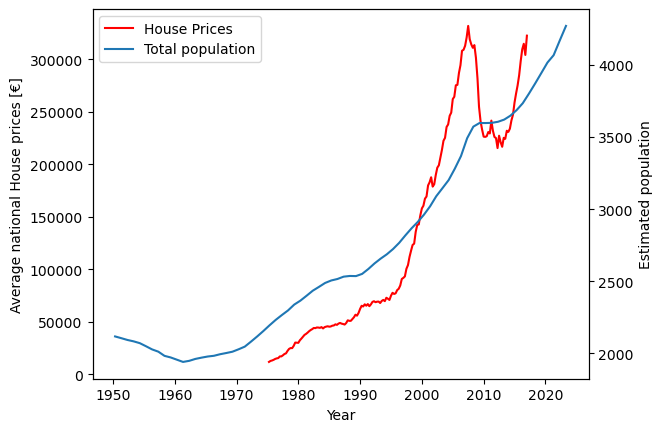

In [20]:
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_pop_filtered_idx4['Date'], real_pop_filtered_idx4['VALUE'], label = 'Total population')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('Estimated population')
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()



Looking at the housing supply vs house prices - we would expect to see more antagonistic realtionship here where supply is high prices should be lower. However this affect has a significant temporal lag and other factors taken into account. We certaining start seeing the affect of consistent low supply more recently. More data is needed to complete this picture. 

Text(0, 0.5, 'New dwellings completed')

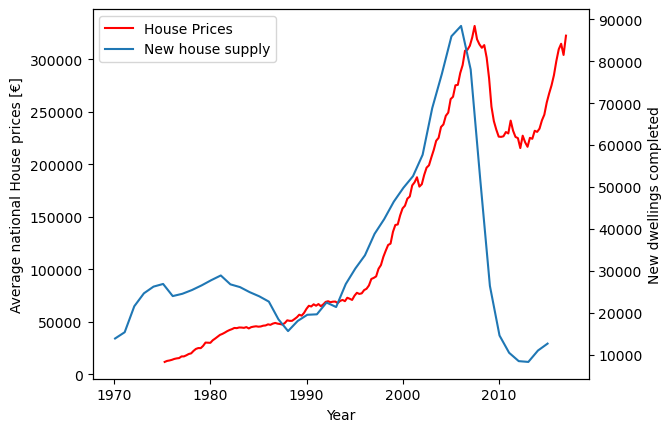

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_supp_idx3['Date'], real_supp_idx3['real_supp'], label = 'New house supply')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('New dwellings completed') 
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')

GDP per capita seems to be one variable that correlates extremely well with house prices. GDP would be strong indicator of income growth as well as comsumer confidence. 

Text(0, 0.5, 'GDP per Capita [$]')

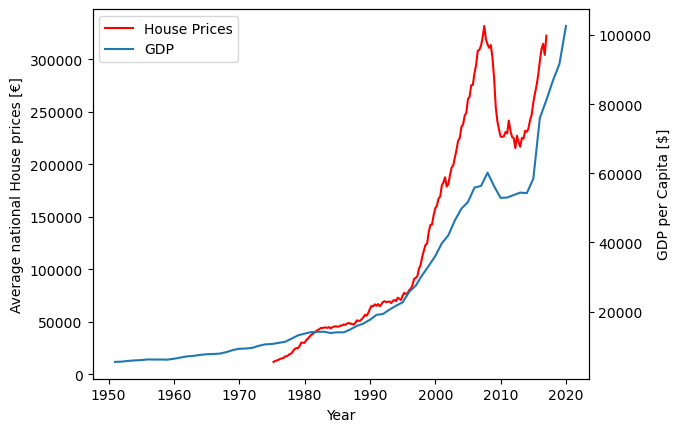

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_GDP_filtered_idx6['Date'], real_GDP_filtered_idx6['GDP per capita (output, multiple price benchmarks)'], label = 'GDP')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP per Capita [$]') 
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')

Interest rates correlate well with house prices as well, however it is a more nuanced relationship. historical very high interet rates > 8 % led to very slow house price increases. Lower interest rates in the late 90's seems to allow for a steep increase in house prices. An interesting strong correlation can be seen in the period post 2000 where interest rates rose rapidly and then fell which led to a small dip in house prices. 
Looking at the lag from when the interest rate peak around ``date2 = '2000-12-01'`` there is approximately 10 month delay to when the house prices reach a trough. ``date1 = '2001-10-15'``

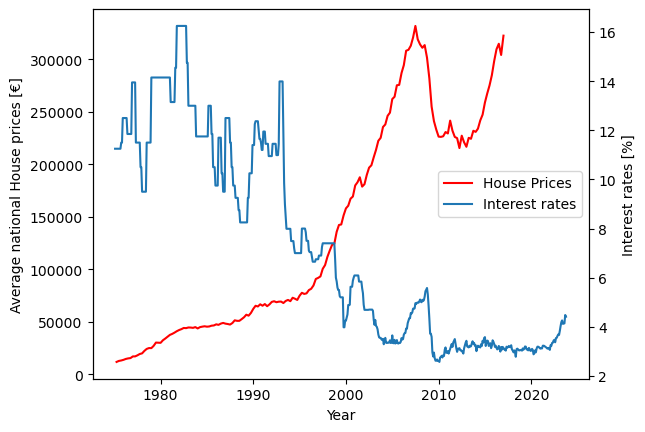

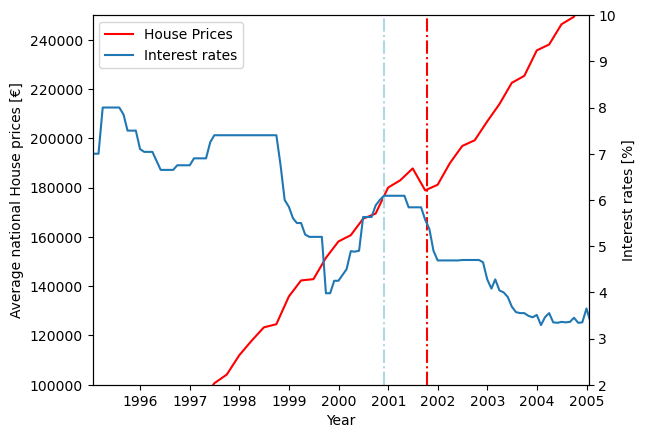

In [23]:
# come back and redo plot with.. 
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_intra_idx['Date'], real_intra_idx['r_intra'], label='Interest rates')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')
ax2.set_xlabel('Year')
ax2.set_ylabel('Interest rates [%]')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['Date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_intra_idx['Date'], real_intra_idx['r_intra'], label='Interest rates')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('Interest rates [%]')
range1 = '1995-01-15'
range2 = '2005-01-15'
ax.set_xlim(pd.to_datetime(range1),pd.to_datetime(range2))
ax.set_ylim(100000,250000)
ax2.set_ylim(2,10)


#https://stackoverflow.com/questions/43641757/matplotlib-vlines-between-dates-on-x-axis
date1 = '2001-10-15'
ax.axvline(pd.to_datetime(date1), linestyle='-.', color='red', label='Vertical Line')
date2 = '2000-12-01'
ax.axvline(pd.to_datetime(date2), linestyle='-.', color='lightblue', label='Vertical Line')

plt.show()

### 4.1. To summarise the data we have imported for analysis we have: 

Interest rate data 
- [4.1] 1975M01 - 2008M09 monthly and [4.2] 2003M01 - 2023M09 monthly data - data amalgamated in file "interest_rate.csv" 

House prices data 

- [5.1] 1975Q1 - 2016Q4 quarterly and [5.2] 2005M01 - 2023M09 monthly data  

data set [5.1.] = "house_prices.csv". Two data setts amalgamated in file " house_prices_update.xslx". not used yet. 

Population data 

- [6] 1950 - 2023 yearly data 
data set located - "population.csv" 

Housing supply data 

- [8] 1970-2016 yearly data 

data set located - "housing_supply.csv"

GDP data 

- [11] 1950-2016 yearly data 

data set located - gdp.csv

***


## 5. Exploratory data analysis -

 ### 5.1.Reprocessing for EDA 

In order to determine the correlation coefficient between pairs of data they need to have a common timestamp. Therefore i need to resample all the data sets to yearly. The house price data is reported monthly and the interest rate quarterly. Datetime index for all data sets needs to be harmonised as well so they can be merged into one dataframe. 
Also the data range needs to be trunated to 1975 - 2015.   

In [24]:
real_intra_idx['Date'] = pd.to_datetime(real_intra_idx['Date'])
real_intra_idx.set_index('Date', inplace=True) # set index 
real_intra_idx_y = real_intra_idx.resample('Y', convention='start').last() # resaple to yearly 
real_intra_idx_y_trun = real_intra_idx_y.loc['1975-12-31':'2015-12-31', 'r_intra'] # trunate 
real_intra_idx_y_trun.head(2)

Date
1975-12-31    12.50
1976-12-31    13.95
Freq: A-DEC, Name: r_intra, dtype: float64

In [25]:
real_price_filtered_idx2['Date'] = pd.to_datetime(real_price_filtered_idx2['Date'])
real_price_filtered_idx2.set_index('Date', inplace=True)
real_price_filtered_idx2_y = real_price_filtered_idx2.resample('Y', convention='start').last()
real_price_filtered_idx2_y_trun = real_price_filtered_idx2_y.loc['1975-12-31':'2015-12-31', 'VALUE'] 
real_price_filtered_idx2_y_trun.head(2)

Date
1975-12-31    13892.0
1976-12-31    17130.0
Freq: A-DEC, Name: VALUE, dtype: float64

In [26]:
# merge interest rates and price 
merged_df = pd.merge(real_intra_idx_y_trun, real_price_filtered_idx2_y_trun, on='Date', how='inner')
merged_df.head(2) # ok that works now 

,r_intra,VALUE
Date,,
1975-12-31,12.50,13892.0
1976-12-31,13.95,17130.0


In [27]:
# the population dataframe won't merge to the main dataframe because the datetime indexes are different - generate a new date index for population 
#drop the old date range 
real_pop_filtered_idx4 = real_pop_filtered_idx4.drop(columns=['Date']) 
#generate a new one 
idx8 = pd.date_range("1950-12-31", periods = 74, freq ="12M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx8 = pd.DataFrame(idx8)
df_idx8.index = range(len(df_idx8))
df_idx8 = pd.DataFrame({'Date': idx8})
df_idx8.head()
# add it to the dataframe 
real_pop_filtered_idx8 = pd.concat([df_idx8, real_pop_filtered_idx4], axis = 1)
real_pop_filtered_idx8 # it worked ! 
# set the index 
real_pop_filtered_idx8['Date'] = pd.to_datetime(real_pop_filtered_idx8['Date'])
real_pop_filtered_idx8.set_index('Date', inplace=True)
#and trunate to the correct range... 
real_pop_filtered_idx8_trun = real_pop_filtered_idx8.loc['1975-12-31':'2015-12-31', 'VALUE'] 
real_pop_filtered_idx8_trun.head(2)

Date
1975-12-31    2194.6
1976-12-31    2232.3
Name: VALUE, dtype: float64

In [28]:
# Merge the DataFrames on the 'Date' index
merged_df2 = pd.merge(real_pop_filtered_idx8_trun, merged_df, on='Date', how='inner')
merged_df2.head(2) # that worked... phew 

,VALUE_x,r_intra,VALUE_y
Date,,,
1975-12-31,2194.6,12.50,13892.0
1976-12-31,2232.3,13.95,17130.0


In [29]:
real_supp_idx3.head(2)

,Date,date,real_supp
0,1970-01-31,1970,13887
1,1971-01-31,1971,15380


In [30]:
# need to do the same with the supply dataframe -  
#drop the old date range 
real_supp_idx3 = real_supp_idx3.drop(columns=['Date']) 
#generate a new one 
idx9 = pd.date_range("1970-12-31", periods = 46, freq ="12M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx9 = pd.DataFrame(idx9)
df_idx9.index = range(len(df_idx9))
df_idx9 = pd.DataFrame({'Date': idx9})
df_idx9.head()
# add it to the dataframe 
real_supp_idx9 = pd.concat([df_idx9, real_supp_idx3], axis = 1)
real_supp_idx9 # it worked ! 
# set the index 
real_supp_idx9['Date'] = pd.to_datetime(real_supp_idx9['Date'])
real_supp_idx9.set_index('Date', inplace=True)
#and trunate to the correct range... 
real_supp_idx9_trun = real_supp_idx9.loc['1975-12-31':'2016-12-31', 'real_supp'] 
real_supp_idx9_trun.head(2)

Date
1975-12-31    26892
1976-12-31    24000
Name: real_supp, dtype: int64

In [31]:
merged_df_3 = pd.merge(real_supp_idx9_trun, merged_df2, on='Date', how='inner')
#merged_df_2 = pd.merge(merged_df, real_pop_filtered_idx4_trun, on='Date', how='inner')
#merged_df_3 = merged_df_2.insert(loc=len(real_supp_idx3_trun2.columns), column='real_supp', value=real_supp_idx3_trun2)      #pd.merge(merged_df_2, real_supp_idx3_trun2['real_supp'], how='inner')
merged_df_3.head(2)
##merged_df_2 = pd.merge(merged_df, real_pop_filtered_idx4_trun, on='Date', how='inner')
#merged_df_3 = merged_df_2.insert(loc=len(real_supp_idx3_trun2.columns), column='real_supp', value=real_supp_idx3_trun2)      #pd.merge(merged_df_2, real_supp_idx3_trun2['real_supp'], how='inner')
#merged_df_2

,real_supp,VALUE_x,r_intra,VALUE_y
Date,,,,
1975-12-31,26892,2194.6,12.50,13892.0
1976-12-31,24000,2232.3,13.95,17130.0


In [32]:
real_GDP_filtered_idx6.head(2)

,Date,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,1950-12-31,Ireland,IRL,1950,5439.0483
1,1951-12-31,Ireland,IRL,1951,5512.5454


In [33]:
# set the index 
real_GDP_filtered_idx6['Date'] = pd.to_datetime(real_GDP_filtered_idx6['Date'])
real_GDP_filtered_idx6.set_index('Date', inplace=True)
#and trunate to the correct range... 
real_GDP_filtered_idx6_trun = real_GDP_filtered_idx6.loc['1975-12-31':'2016-12-31', 'GDP per capita (output, multiple price benchmarks)'] 
real_GDP_filtered_idx6_trun.head(2)


Date
1975-12-31    10943.160
1976-12-31    11243.767
Name: GDP per capita (output, multiple price benchmarks), dtype: float64

In [34]:
merged_df_4 = pd.merge(real_GDP_filtered_idx6_trun, merged_df_3, on='Date', how='inner')
#merged_df_2 = pd.merge(merged_df, real_pop_filtered_idx4_trun, on='Date', how='inner')
#merged_df_3 = merged_df_2.insert(loc=len(real_supp_idx3_trun2.columns), column='real_supp', value=real_supp_idx3_trun2)      #pd.merge(merged_df_2, real_supp_idx3_trun2['real_supp'], how='inner')
merged_df_4.head(2)

,"GDP per capita (output, multiple price benchmarks)",real_supp,VALUE_x,r_intra,VALUE_y
Date,,,,,
1975-12-31,10943.160,26892,2194.6,12.50,13892.0
1976-12-31,11243.767,24000,2232.3,13.95,17130.0


### 5.2 Dataframe 
 Finally we have a dataframe containing all five columns resampled with the same datetime index. Unfortunately we have down sampled the data to yearly reporting which only leaves 41 data points for period 1975-2015. Perhaps I should interpolate the yearly data sets (population, supply and GDP) and then upsampled to monthly/quarterly (if i have enough time i will look at this). 

In [35]:

df = merged_df_4.rename(columns={
    'GDP per capita (output, multiple price benchmarks)': 'GDP_per_capita',
    'real_supp': 'real_supp',
    'VALUE_x': 'real_population',
    'r_intra': 'r_intra',
    'VALUE_y': 'r_price'
})
# look at the top and bottom of the dataframe to check date range 
df.iloc[np.r_[:2, -2:0]]

,GDP_per_capita,real_supp,real_population,r_intra,r_price
Date,,,,,
1975-12-31,10943.160,26892,2194.6,12.50,13892.0
1976-12-31,11243.767,24000,2232.3,13.95,17130.0
2014-12-31,58406.457,11016,3647.9,3.58,258989.0
2015-12-31,75990.266,12666,3686.1,3.30,298551.0


### 5.3. Replot the resampled and trunated data set in new dataframe df 

variables can now be directly compared and correlations determined. 

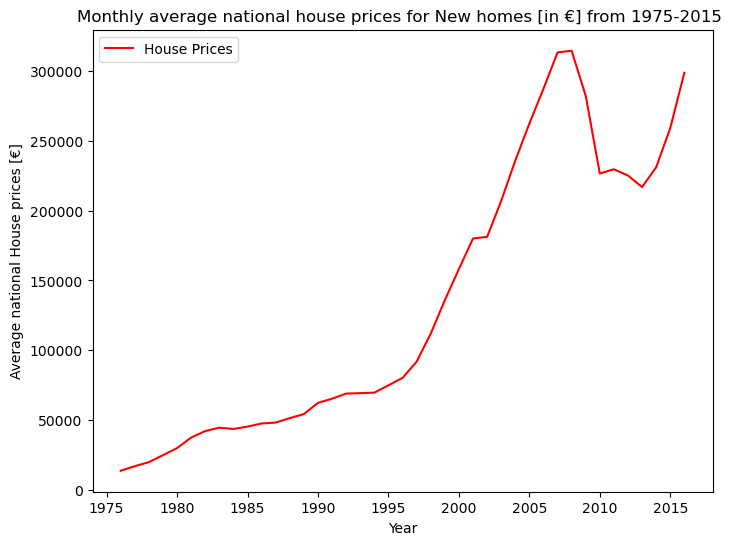

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df.index, df['r_price'], color='red', label='House Prices')
#plt.plot(real_price_index_filtered_idx7['Date'], real_price_index_filtered_idx7['VALUE'], color='Blue', label='House Prices (from price index)')
plt.xlabel('Year')
plt.ylabel('Average national House prices [\u20AC]')
plt.title('Monthly average national house prices for New homes [in \u20AC] from 1975-2015 ')
plt.legend(loc="upper left")
plt.show()

Text(0.5, 0, 'Year')

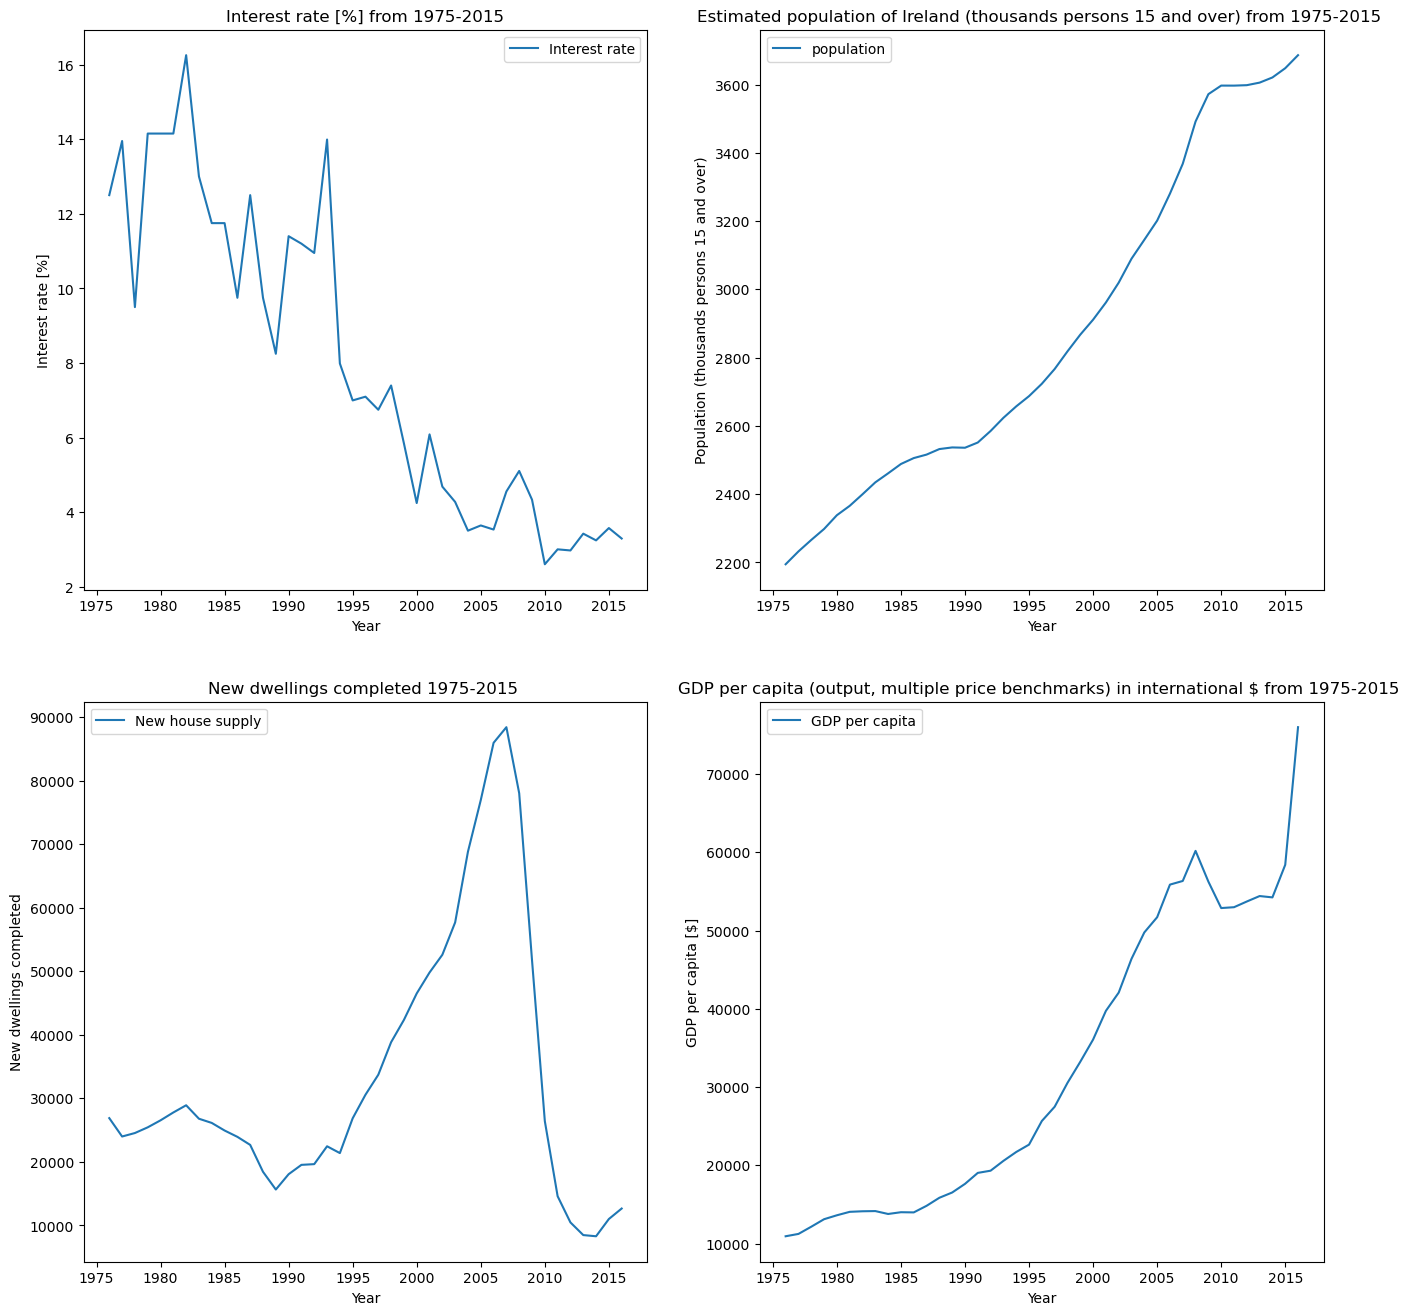

In [37]:
# plots 
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0, 0].plot(df.index, df['r_intra'], label = 'Interest rate')
ax[0, 0].set_title('Interest rate [%] from 1975-2015')
ax[0, 0].legend(loc='upper right')
ax[0, 0].set_ylabel('Interest rate [%]') 
ax[0, 0].set_xlabel('Year')

ax[0, 1].plot(df.index, df['real_population'], label = 'population')
ax[0, 1].set_title('Estimated population of Ireland (thousands persons 15 and over) from 1975-2015 ')
ax[0, 1].legend(loc='upper left')
ax[0, 1].set_ylabel('Population (thousands persons 15 and over)') 
ax[0, 1].set_xlabel('Year')

ax[1, 0].plot(df.index, df['real_supp'], label = 'New house supply')
ax[1, 0].set_title('New dwellings completed 1975-2015 ')
ax[1, 0].legend(loc='upper left')
ax[1, 0].set_ylabel('New dwellings completed') 
ax[1, 0].set_xlabel('Year')

ax[1, 1].plot(df.index, df['GDP_per_capita'], label = 'GDP per capita')
ax[1, 1].set_title('GDP per capita (output, multiple price benchmarks) in international $ from 1975-2015 ')
ax[1, 1].legend(loc='upper left')
ax[1, 1].set_ylabel('GDP per capita [$]') 
ax[1, 1].set_xlabel('Year')


In [38]:
df.describe()

,GDP_per_capita,real_supp,real_population,r_intra,r_price
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,32376.208244,33285.463415,2872.648780,7.980732,133178.804878
std,18856.666055,21271.338389,481.978014,4.162345,99522.082963
min,10943.160000,8301.000000,2194.600000,2.610000,13892.000000
25%,14162.080000,19652.000000,2505.700000,4.250000,47689.000000
50%,25668.748000,26420.000000,2723.400000,7.100000,80303.000000
75%,52878.867000,42349.000000,3280.400000,11.750000,226505.000000
max,75990.266000,88419.000000,3686.100000,16.250000,314333.000000


### 5.4. Correlation coefficients 

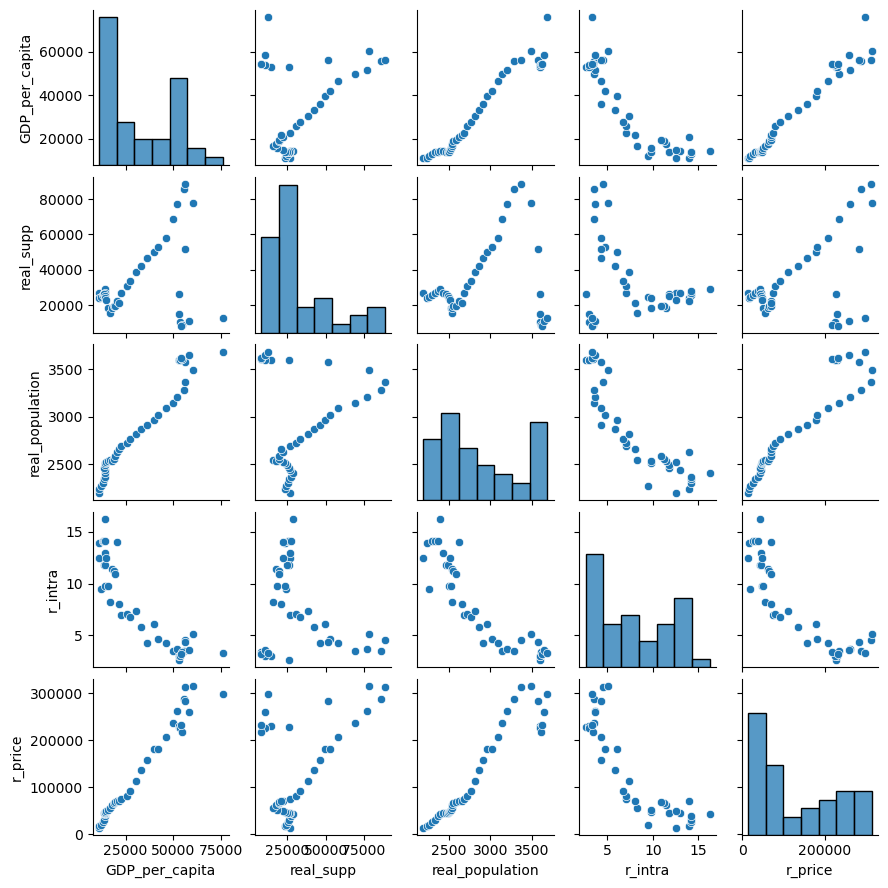

In [39]:
g = sns.pairplot(df, height=1.8)

<Axes: >

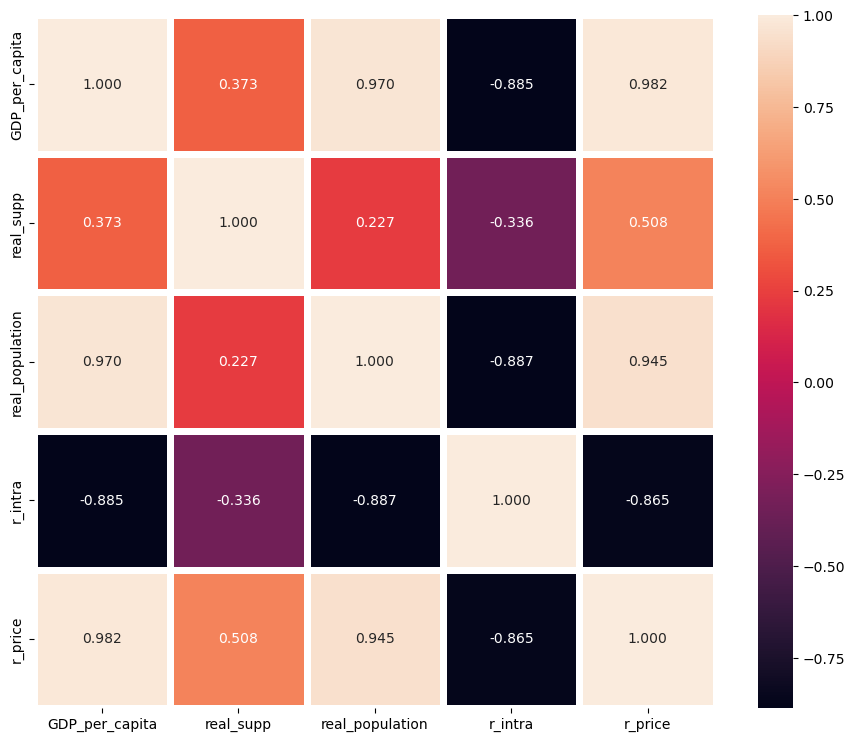

In [40]:
plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True, linewidth=5,fmt='.3f')
# https://stackoverflow.com/questions/41519991/how-to-make-seaborn-heatmap-larger-normal-size
# https://stackoverflow.com/questions/39409866/correlation-heatmap

we can see from the heatmap pairplot that 

- GDP per capita is very highly correlated to the house price with a correlation coefficient  $R^2$ : = 0.982 
- the housing supply is poorly correlated with $R^2$  = 0.508, however since there is a lag with this variables affect it may need to be explored further. 
- the population or demand is again highly correlated with house prices with $R^2$  = 0.945 
- and interest rates are inversely correlated with $R^2$  = -0.865 



### 6. Train linear regression model using random split data set and time based split -  Use model to simulate data for testing 

#### 6.1. Random data split using train_test_split()
 

In [41]:
# The target variable is defined as y and the dependents x 
X = df.drop(columns=['r_price'])
y = df['r_price']
test = 0.8
# Split the data into training and testing sets (test_size= 0.8 will give 80% test (20 % train)) - random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=42)
# train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Lets compare predicted house prices verses the actual house prices for the random sample train/test split.

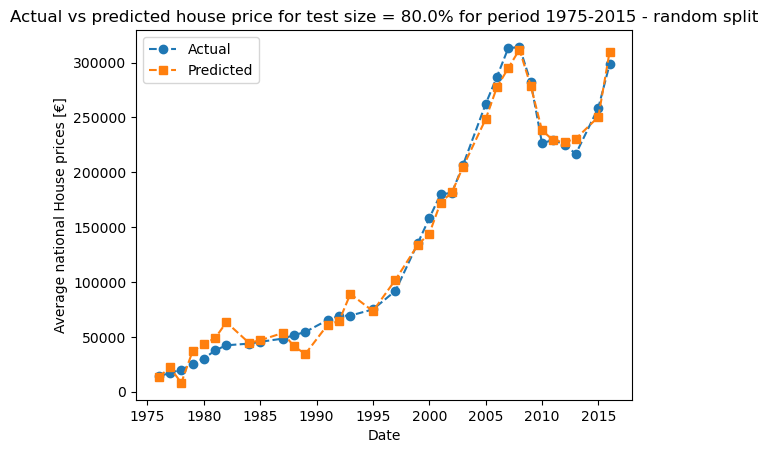

In [42]:
#https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
#https://realpython.com/train-test-split-python-data/

# Make predictions on the test
# 'X_test' is the testing set
y_pred = model.predict(X_test)
y_pred
# DataFrame with the actual and predicted values with X_test values set as index 
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)
comparison_df = comparison_df.sort_index()
# 
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', linestyle='--', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted', linestyle='--', marker='s')
plt.xlabel('Date')
plt.ylabel('Average national House prices [\u20AC]')
plt.title(f'Actual vs predicted house price for test size = {test*100}% for period 1975-2015 - random split')
plt.legend()
plt.show()

### 6.2. Time based data split - manual select 

The ``train_test_split()`` code above takes a random sample of the data points in the data set to train the model which as we saw works well to predict the house prices. However this isn't very useful as its not technically predicting future house prices as such. 
What might be more useful would be to train the linear regression model on the first few years of the data and then try to predict the rest. 

In [43]:
# now test time based split - instead of using train_test_split() - manually define the train/test data
# only 41 data points avaialble 
# Define the number of points for training 
test1 = 0.4
num_train = int(len(df) * test1)
# Split the data into training and testing sets by points using iloc() .. [:num_train, :] selects the rows from the start to num_train from all columns. 
X_train1 = X.iloc[:num_train, :]
y_train1 = y.iloc[:num_train]
X_test1 = X.iloc[num_train:, :]
y_test1 = y.iloc[num_train:]
#num_train

model1 = LinearRegression()
model1.fit(X_train1, y_train1)

print(f'Training period: {X_train1.index[0].year} - {X_train1.index[-1].year}')
print(f'Testing period: {X_test1.index[0].year} - {X_test1.index[-1].year}')

Training period: 1975 - 1990
Testing period: 1991 - 2015


Again lets compare the predicted house prices verses the actual house prices this time using the time based split 

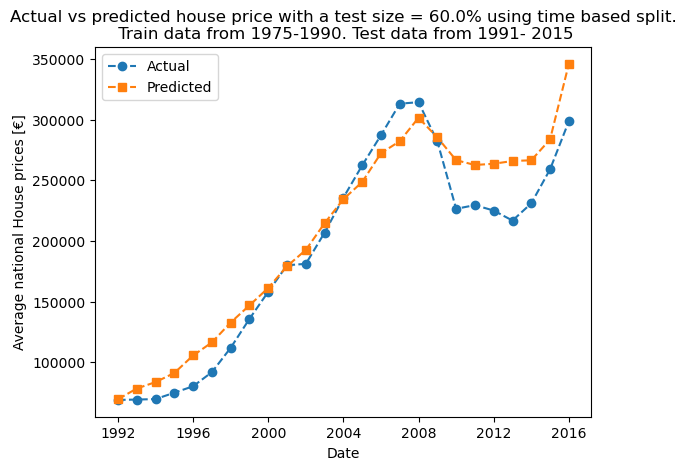

In [44]:
# Make predictions on the test
# 'X_test1' is the testing set for time based split - 
y_pred1 = model1.predict(X_test1)
y_pred1
# DataFrame with the actual and predicted values with X_test values set as index 
comparison_df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1}, index=X_test1.index)
comparison_df1 = comparison_df1.sort_index()
# 
plt.plot(comparison_df1.index, comparison_df1['Actual'], label='Actual', linestyle='--', marker='o')
plt.plot(comparison_df1.index, comparison_df1['Predicted'], label='Predicted', linestyle='--', marker='s')
plt.xlabel('Date')
plt.ylabel('Average national House prices [\u20AC]')
plt.title(f'Actual vs predicted house price with a test size = {(1-test1)*100}% using time based split.\n Train data from {X_train1.index[0].year}-{X_train1.index[-1].year}. Test data from {comparison_df1.index[0].year}- {comparison_df1.index[-1].year}')
plt.legend()
plt.show()


I'm actually amazed now well this works.. I rechecked it several times to make sure its right. This model seems to be able to predict future house prices based on past house prices using linear regression on the 4 variables housing supply, interest rates, population and GDP.   

### 8. Evaluate the two models

use correlation coefficient $R^2$ to gauge the accuracy of the models 

In [45]:
# Calculate R-squared
R_2 = r2_score(y_test, y_pred)
print(f'R\u00B2: {R_2}')

R²: 0.9897649775630151


Use a range of test sizes to evaulate the model1 (random split)

In [46]:
# test sizes to evaluate
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# For Loop to loop through the different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print(f'Test Size = {test_size * 100}% \u27A1 R\u00B2 = {r2:.4f}')

Test Size = 20.0% ➡ R² = 0.9902
Test Size = 30.0% ➡ R² = 0.9864
Test Size = 40.0% ➡ R² = 0.9897
Test Size = 50.0% ➡ R² = 0.9908
Test Size = 60.0% ➡ R² = 0.9917
Test Size = 70.0% ➡ R² = 0.9897
Test Size = 80.0% ➡ R² = 0.9898
Test Size = 90.0% ➡ R² = 0.9403


Plot up the evalutaion - test size as a function of $R^2$. Best correlation is obtained when there is close to a 60/40 split (test size/train size). 


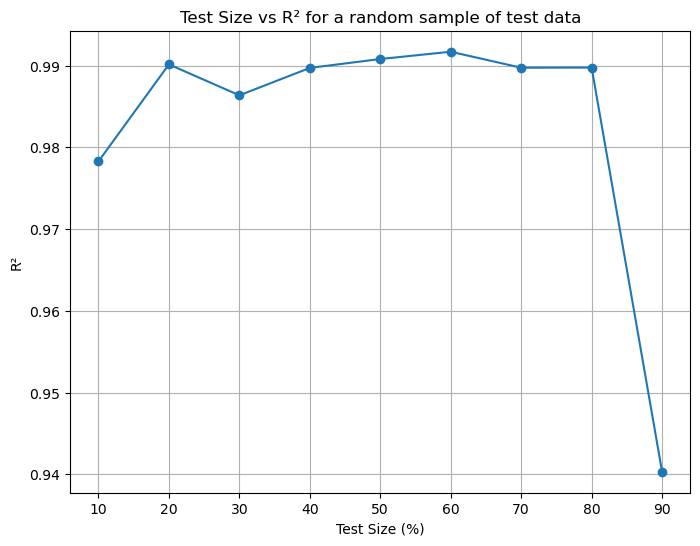

In [47]:
# test sizes to evaluate
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# empty list to store results 
results_data = []
# For Loop to loop through the different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    # Append 
    results_data.append({'Test Size': test_size * 100, 'R-squared': r2})
   
results_df = pd.DataFrame(results_data)
plt.figure(figsize=(8, 6))
plt.plot(results_df['Test Size'], results_df['R-squared'], marker='o')
plt.title('Test Size vs R\u00B2 for a random sample of test data') 
plt.xlabel('Test Size (%)')
plt.ylabel('R\u00B2')
plt.grid(True)


DO the same for the time- based split. Here increasing percentage test size means the train size is smaller but also the data is from an earlier time period as well. 

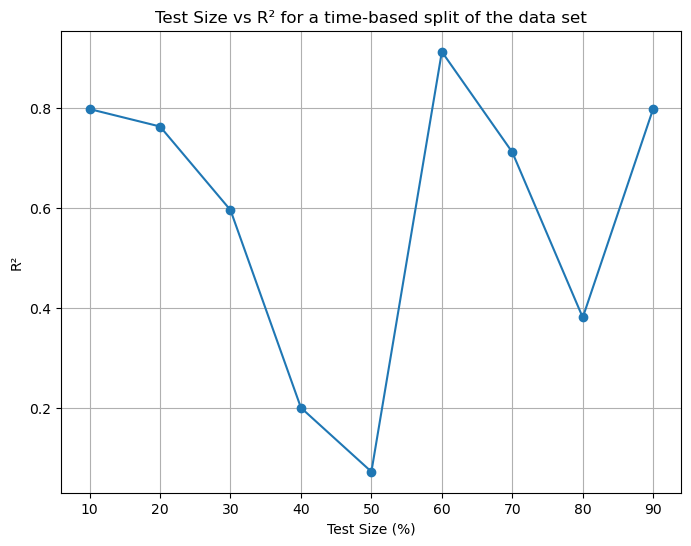

In [48]:
# test sizes to evaluate
test_sizes1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# empty list to store results 
results_data1 = []
# For Loop to loop through the different test sizes
for test_size in test_sizes1:
    num_train = int(len(df) * (1-test_size))
    X_train1 = X.iloc[:num_train, :]
    y_train1 = y.iloc[:num_train]
    X_test1 = X.iloc[num_train:, :]
    y_test1 = y.iloc[num_train:]
    
    model = LinearRegression()
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    
    r2 = r2_score(y_test1, y_pred1)
    # Append 
    results_data1.append({'Test Size': test_size * 100, 'R-squared': r2})
   
results_df1 = pd.DataFrame(results_data1)
plt.figure(figsize=(8, 6))
plt.plot(results_df1['Test Size'], results_df1['R-squared'], marker='o')
plt.title('Test Size vs R\u00B2 for a time-based split of the data set') 
plt.xlabel('Test Size (%)')
plt.ylabel('R\u00B2')
plt.grid(True)

The correlation of the actual and predicted house prices using the time-based split varies quite a bit depending on the test size. The R2 value drops as the test size increases (train size decreases) up until 50 % split as expected. However the best correlation coefficient is then obtained with a 60/40 (test/train) split. 




I wondered whether the model needed more data to improve the prediction accuracy. I thought perhaps i could interploate the data sets with the yearly reporting (Popualtion, Supply and GDP) and resample to monthly in order to increase the number of available data points. 

However I have run out of time to complete this. 

In [49]:
df.head()

,GDP_per_capita,real_supp,real_population,r_intra,r_price
Date,,,,,
1975-12-31,10943.160,26892,2194.6,12.50,13892.0
1976-12-31,11243.767,24000,2232.3,13.95,17130.0
1977-12-31,12164.756,24548,2265.9,9.50,20042.0
1978-12-31,13122.535,25444,2298.0,14.15,25030.0
1979-12-31,13624.624,26544,2338.3,14.15,30078.0


In [50]:
from scipy.interpolate import CubicSpline

# cubic spline interpolation on the CH4 data 
#df['Date'] = pd.to_datetime(df['Date'])
spline_pop = CubicSpline(df.index, df['real_population']) 
spline_supp = CubicSpline(df.index, df['real_supp']) 
spline_GDP = CubicSpline(df.index, df['GDP_per_capita']) 


# Generate points for the interpolated curve - time 
#generate a new one 
idx_inter = pd.date_range("1975-12-31", periods = 493, freq ="M" )

numeric_index = pd.to_numeric(df.index)

# Use numeric values for linspace
inter_points = np.linspace(min(numeric_index), max(numeric_index), 41)

inter_pop = spline_pop(inter_points)
inter_supp = spline_supp(inter_points)
inter_GDP = spline_GDP(inter_points)

resampled_pop = np.interp(idx_inter, inter_points, inter_pop)
resampled_supp = np.interp(idx_inter, inter_points, inter_supp)
resampled_GDP = np.interp(idx_inter, inter_points, inter_GDP)

# new DataFrame
resampled_df = pd.DataFrame({'Date': idx_inter, 'population': resampled_pop, 'Supply': resampled_supp})
resampled_df

,Date,population,Supply
0,1975-12-31,2194.600000,26892.000000
1,1976-01-31,2197.793444,26646.636994
2,1976-02-29,2200.780859,26417.103859
3,1976-03-31,2203.974303,26171.740853
4,1976-04-30,2207.064732,25934.292783
...,...,...,...
488,2016-08-31,3686.100000,12666.000000
489,2016-09-30,3686.100000,12666.000000
490,2016-10-31,3686.100000,12666.000000
491,2016-11-30,3686.100000,12666.000000
